## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6bEaeHY1YeWbQd7L6FEx")
project = rf.workspace("my-frist-project-ltwwa").project("rock-paper-scissors-presentation-uuikc")
version = project.version(1)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-Presentation-1 in yolov8-obb:: 100%|██████████| 480/480 [00:00<00:00, 7552.91it/s]


In [7]:
!pip install ultralytics roboflow

  Using cached ultralytics-8.3.229-py3-none-any.whl.metadata (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [9]:
# Simulan ang training gamit ang CLI command
!yolo task=obb mode=train model=yolo11n-obb.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Rock-Paper-Scissors-Presentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [10]:
# Mag-test sa isang random image mula sa test set
import glob
from IPython.display import Image, display

# Kumuha ng random na image sa test folder
import random
test_images = glob.glob(f"{dataset.location}/test/images/*")
random_image = random.choice(test_images)

print(f"Testing on: {random_image}")

# I-run ang prediction
!yolo task=obb mode=predict model=runs/obb/train/weights/best.pt source="{random_image}"

# Ipakita ang result (Check the path provided in the output logs, usually runs/obb/predict/...)
# Note: Minsan nag-iiba ang folder name (predict, predict2, etc.) kaya check mo ang output log.

Testing on: /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1626460213979_png_jpg.rf.2526f3ecb5d0c05fce4f828d5ed95ad5.jpg
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,654,308 parameters, 0 gradients, 6.6 GFLOPs

image 1/1 /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1626460213979_png_jpg.rf.2526f3ecb5d0c05fce4f828d5ed95ad5.jpg: 640x640 1 Scissors, 11.0ms
Speed: 3.8ms preprocess, 11.0ms inference, 82.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

Testing on: /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1624550293327_png_jpg.rf.ae371c60bf9b6f2f27a8ec720aaabe57.jpg

image 1/1 /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1624550293327_png_jpg.rf.ae371c60bf9b6f2f27a8ec720aaabe57.jpg: 640x640 1 Scissors, 10.6ms
Speed: 3.9ms preprocess, 10.6ms inference, 83.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict2


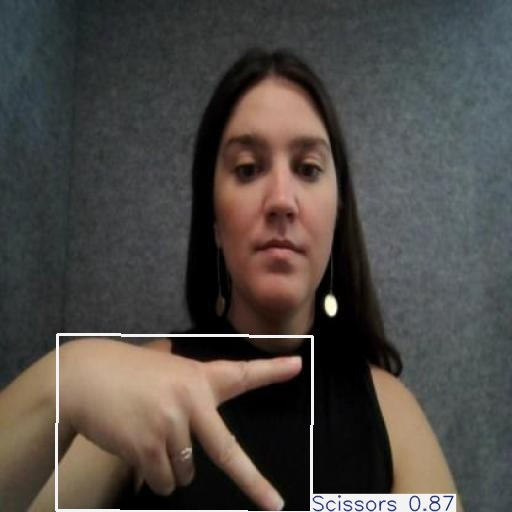

In [11]:
import os
from ultralytics import YOLO
from IPython.display import Image, display
import glob
import random

# 1. I-define ang HOME directory (para gumana yung f'{HOME}')
HOME = os.getcwd()

# 2. I-load ang model na tinrain mo
# Note: Siguraduhing tapos na ang training sa previous steps.
# Ang path ay usually 'runs/obb/train/weights/best.pt' kapag OBB task.
custom_model = YOLO(f'{HOME}/runs/obb/train/weights/best.pt')

# 3. Pumili ng random image mula sa test dataset mo para i-predict
# (Dahil wala tayong URL ng aso, gagamit tayo ng sample sa dataset mo)
test_images_path = glob.glob(f"{dataset.location}/test/images/*")
random_image_path = random.choice(test_images_path)

print(f"Testing on: {random_image_path}")

# 4. I-run ang predict command
# save=True -> para ma-save yung image na may box
# conf=0.25 -> kailangan 25% sure si AI bago niya i-box
results = custom_model.predict(source=random_image_path, conf=0.25, save=True)

# 5. Ipakita ang result dito sa Notebook
# Hahanapin natin kung saan sinave ni YOLO yung result (usually sa runs/obb/predict...)
latest_predict_folder = sorted(glob.glob(f'{HOME}/runs/obb/predict*'))[-1]
image_name = os.path.basename(random_image_path)
result_image_path = f"{latest_predict_folder}/{image_name}"

display(Image(filename=result_image_path, width=600))

In [13]:
# Kunin ang result ng unang image (dahil isa lang naman ang prinocess natin)
result = results[0]

# 1. OBB Coordinates (x_center, y_center, width, height, rotation)
# Imbis na .boxes.xyxy, gagamit tayo ng .obb.xywhr para sa rotated boxes
print("Coordinates (xywhr):")
print(result.obb.xywhr)

print("\n-------------------\n")

# 2. Confidence Score (Gaano ka-sure si AI? 1.0 means 100%)
print("Confidence Scores:")
print(result.obb.conf)

print("\n-------------------\n")

# 3. Class IDs (0 = Rock, 1 = Paper, etc. depende sa dataset mo)
print("Class IDs:")
print(result.obb.cls)

Coordinates (xywhr):
tensor([[1.8468e+02, 4.2327e+02, 2.5474e+02, 1.7582e+02, 7.1644e-03]], device='cuda:0')

-------------------

Confidence Scores:
tensor([0.8718], device='cuda:0')

-------------------

Class IDs:
tensor([2.], device='cuda:0')


## Custom Training

/content
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Rock-Paper-Scissors-Presentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

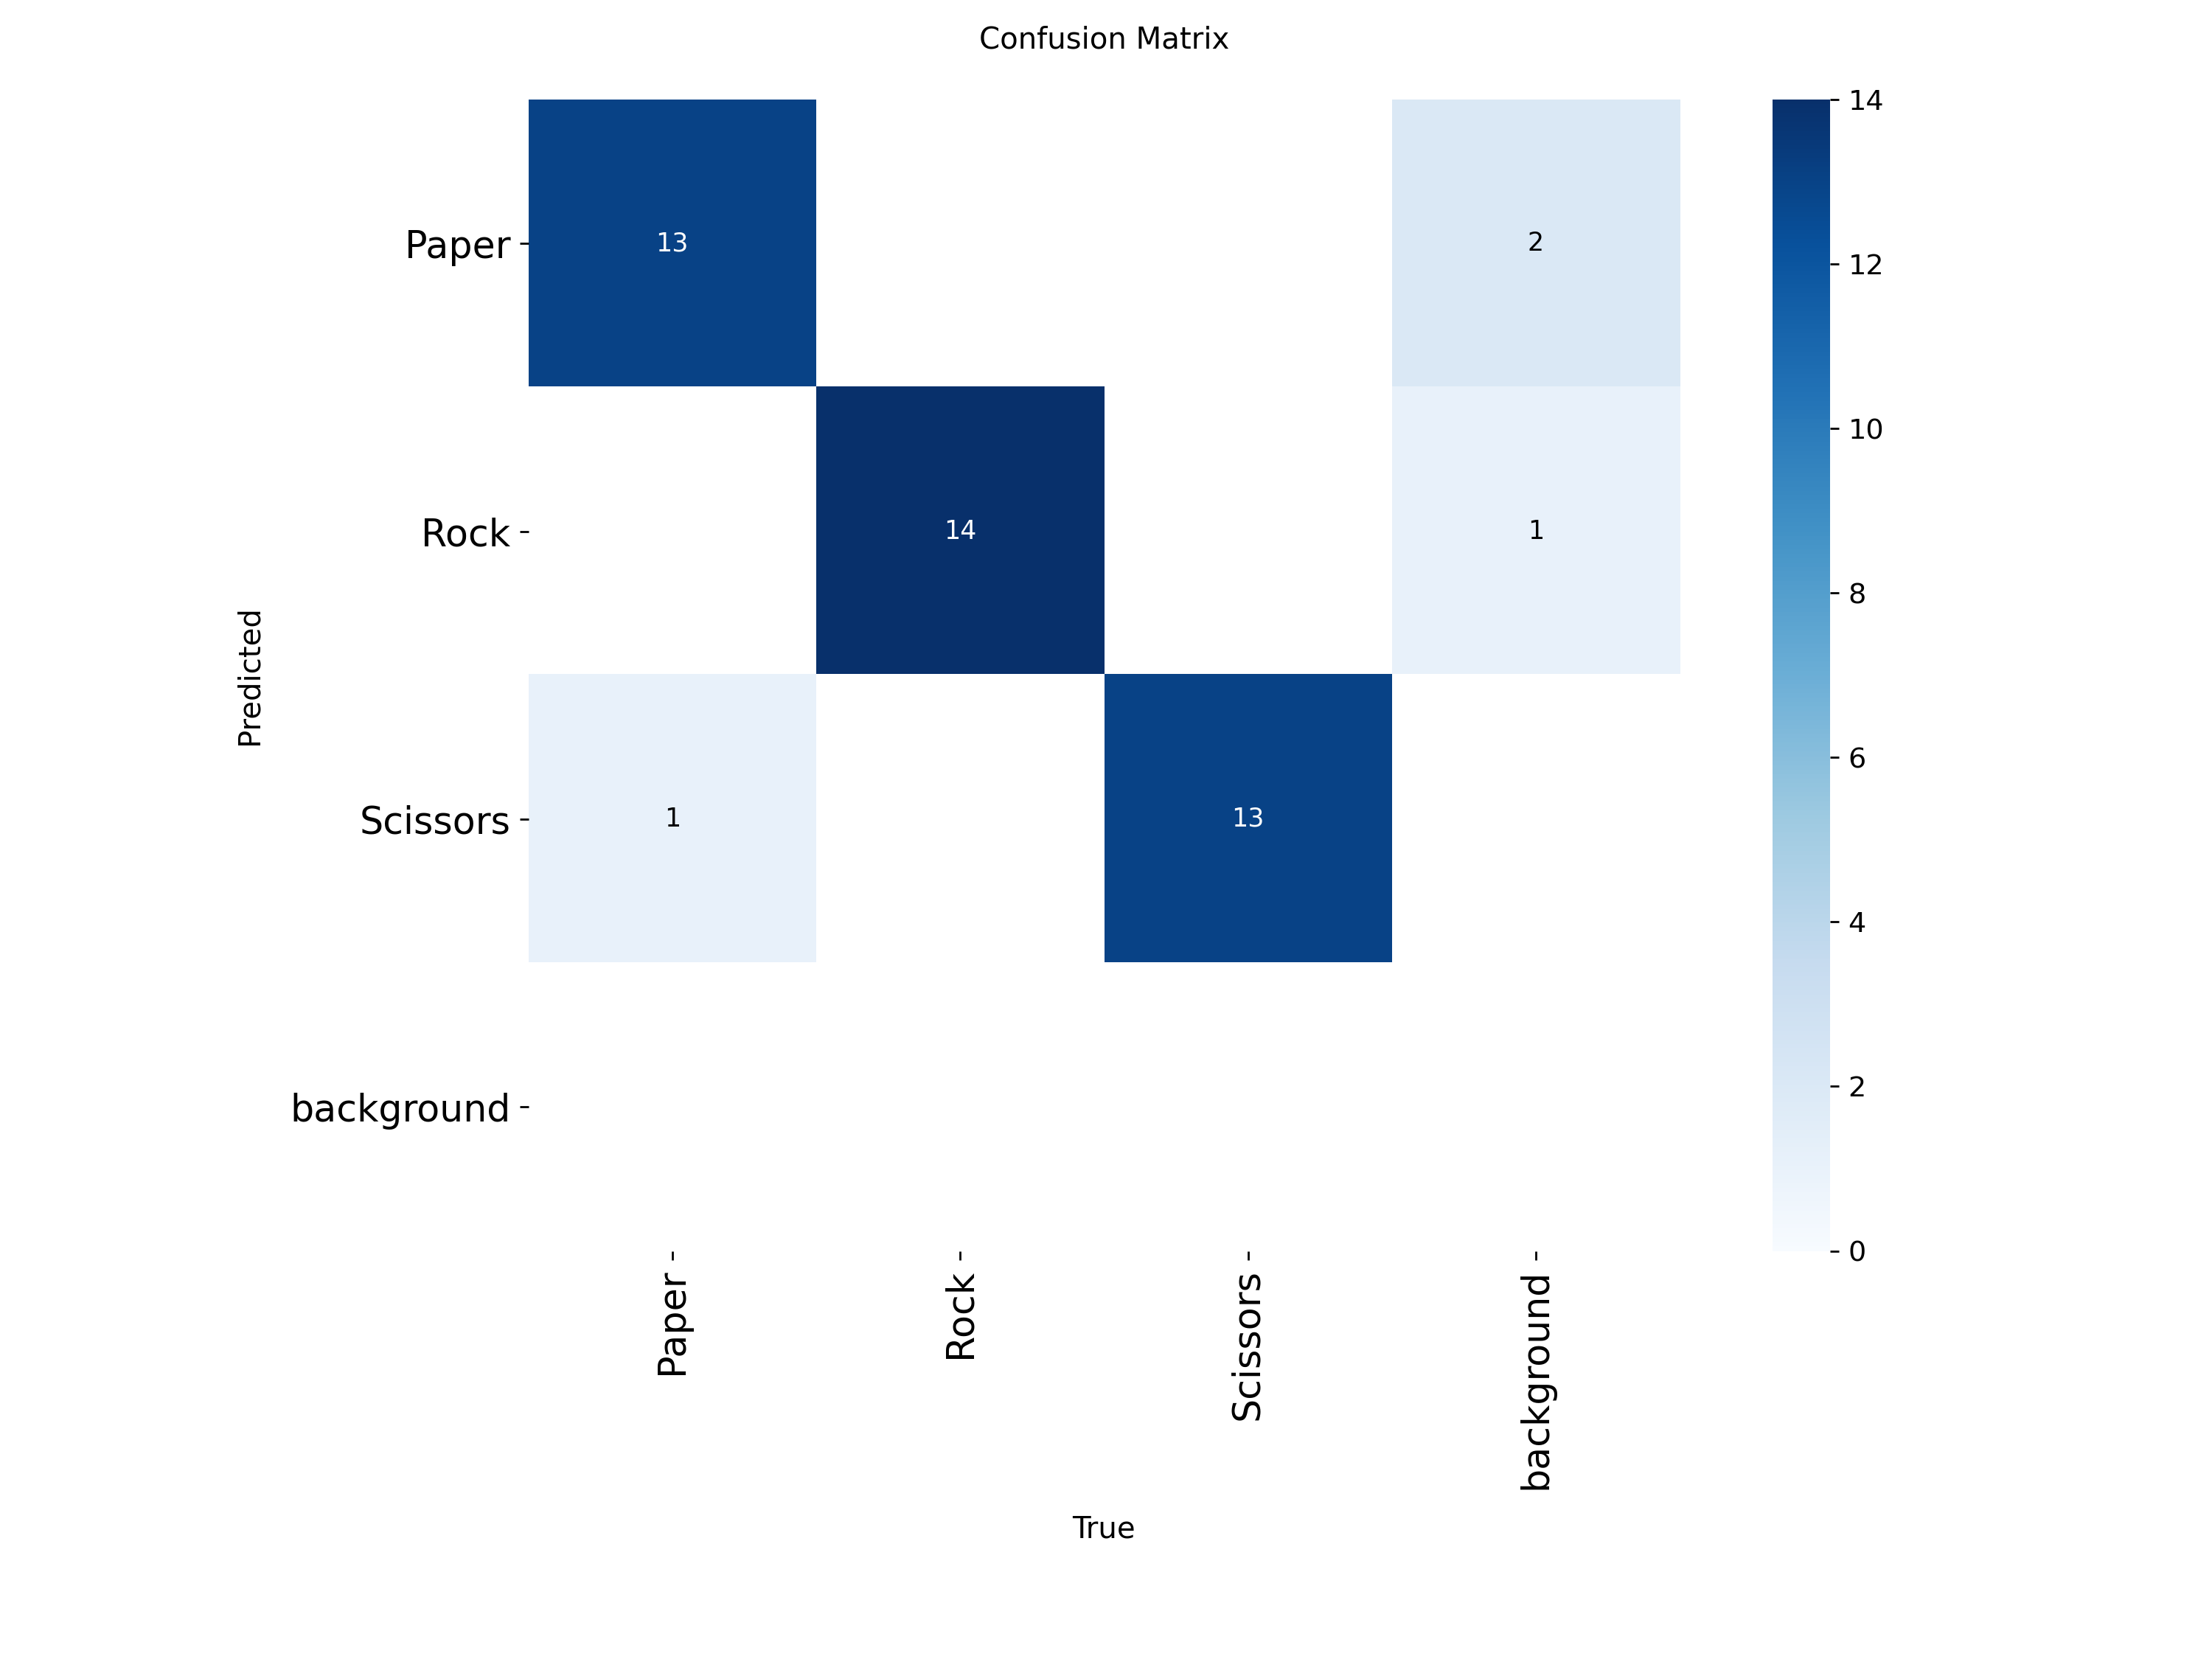

In [15]:
%cd {HOME}

# IMPORTANT:
# 1. task=obb (Dahil rotated boxes ang gamit natin)
# 2. model=yolo11n-obb.pt (Gamitin natin ang OBB version ng YOLO11)
# 3. imgsz=640 (Standard size, pwede mo ibalik sa 800 kung kaya ng GPU mo)

!yolo task=obb mode=train model=yolo11n-obb.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

%cd {HOME}

# Note: Ang results ng OBB ay napupunta sa runs/obb/train (hindi runs/detect)
from IPython.display import Image, display
display(Image(filename=f'{HOME}/runs/obb/train/confusion_matrix.png', width=800))

/content


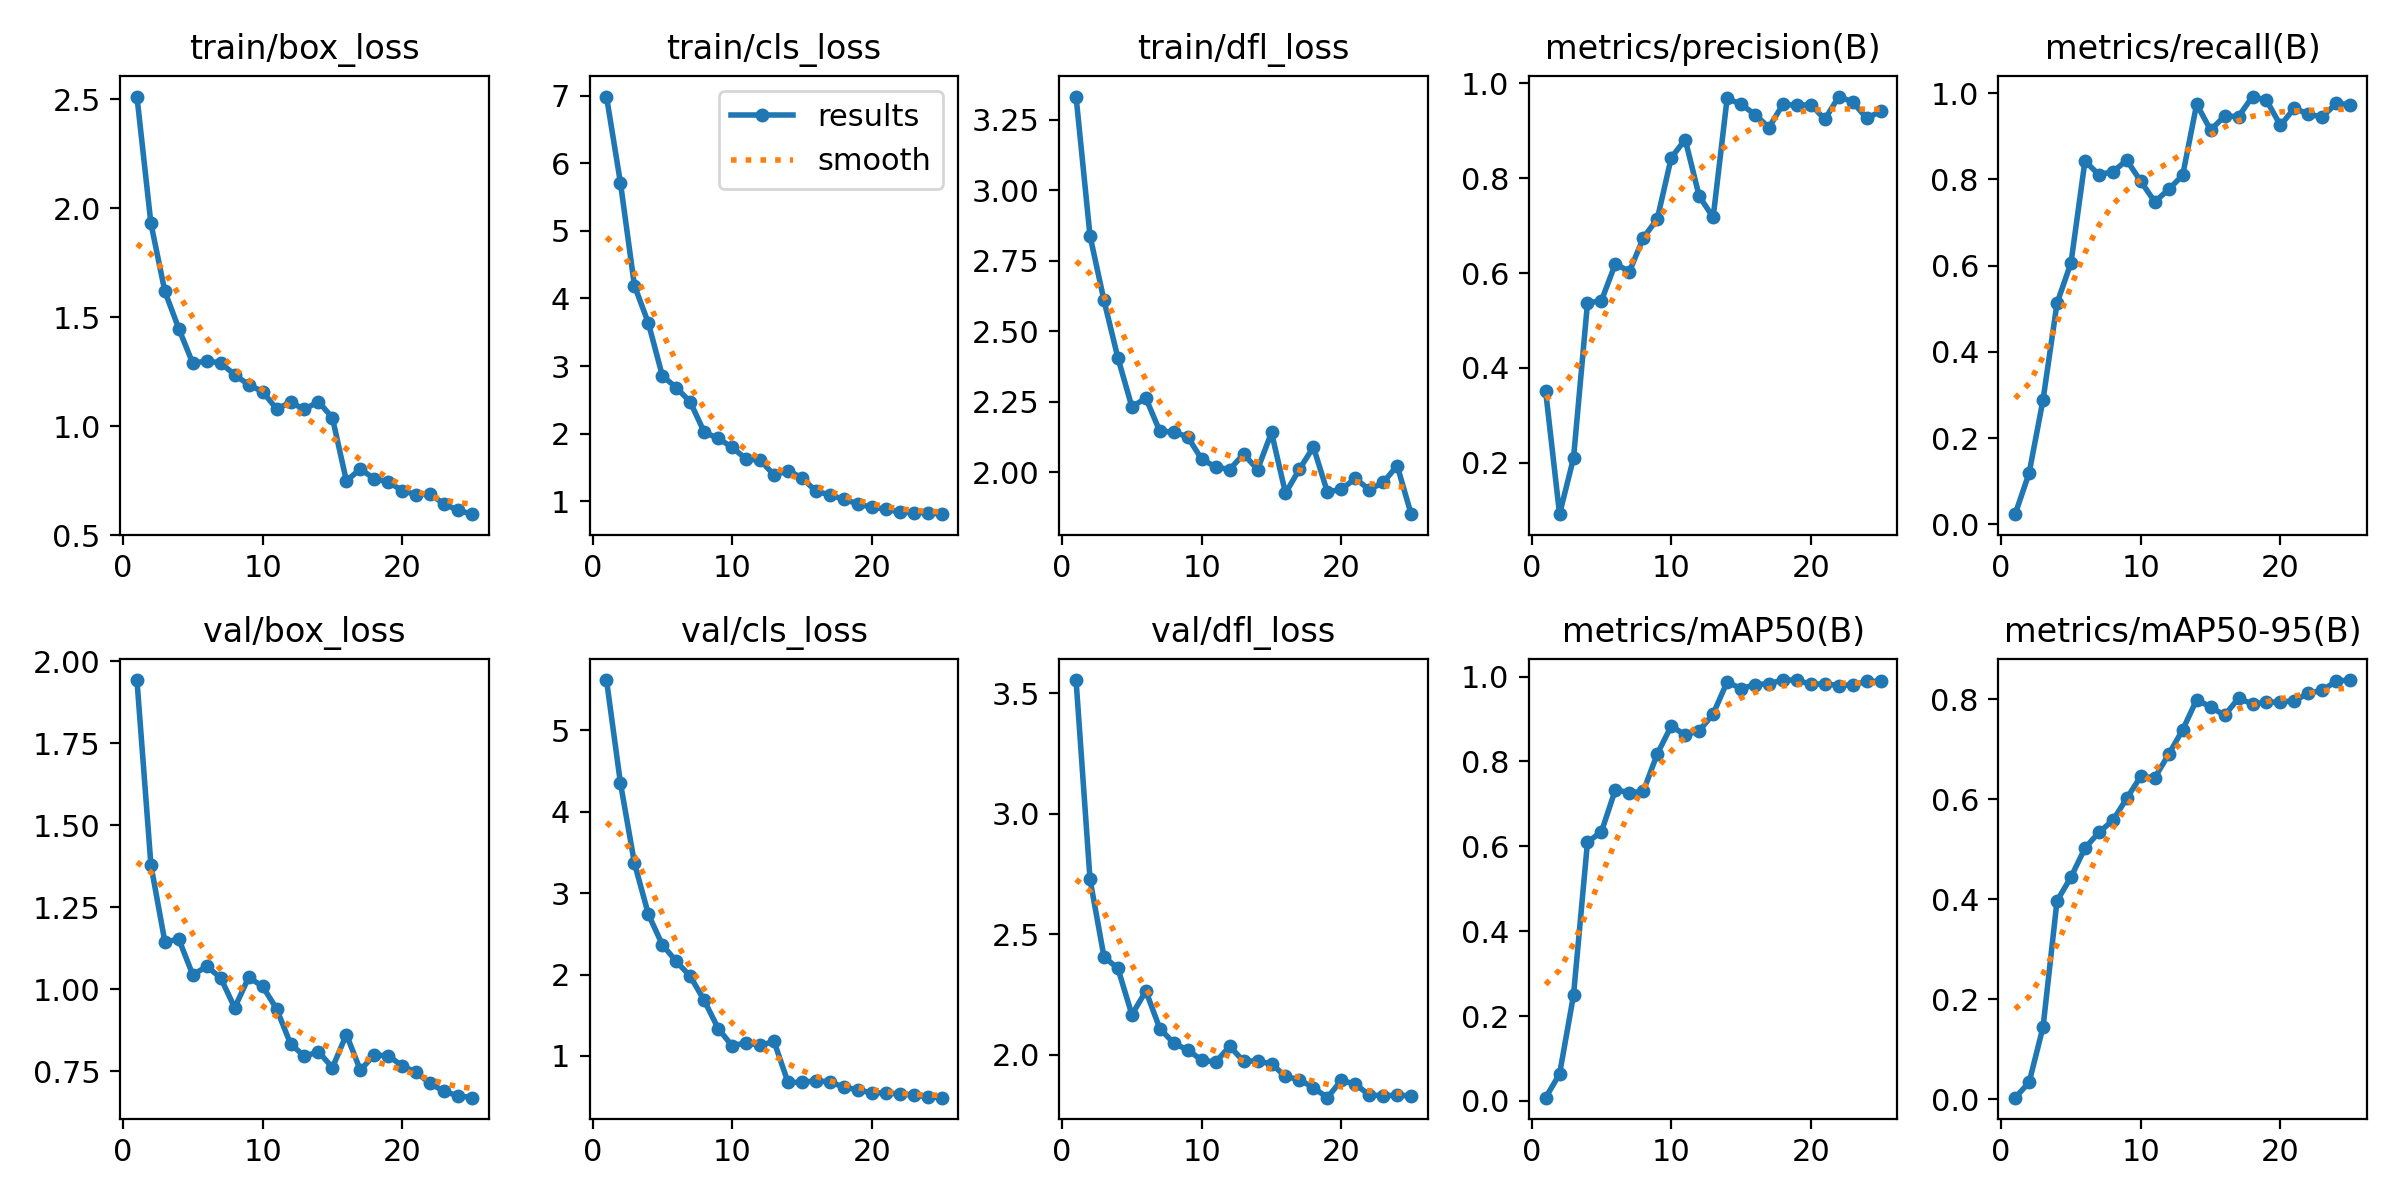

In [16]:
%cd {HOME}
from IPython.display import Image, display

# Pinalitan ko ang 'detect' ng 'obb' para mahanap niya yung tamang graph
display(Image(filename=f'{HOME}/runs/obb/train/results.png', width=800))

/content


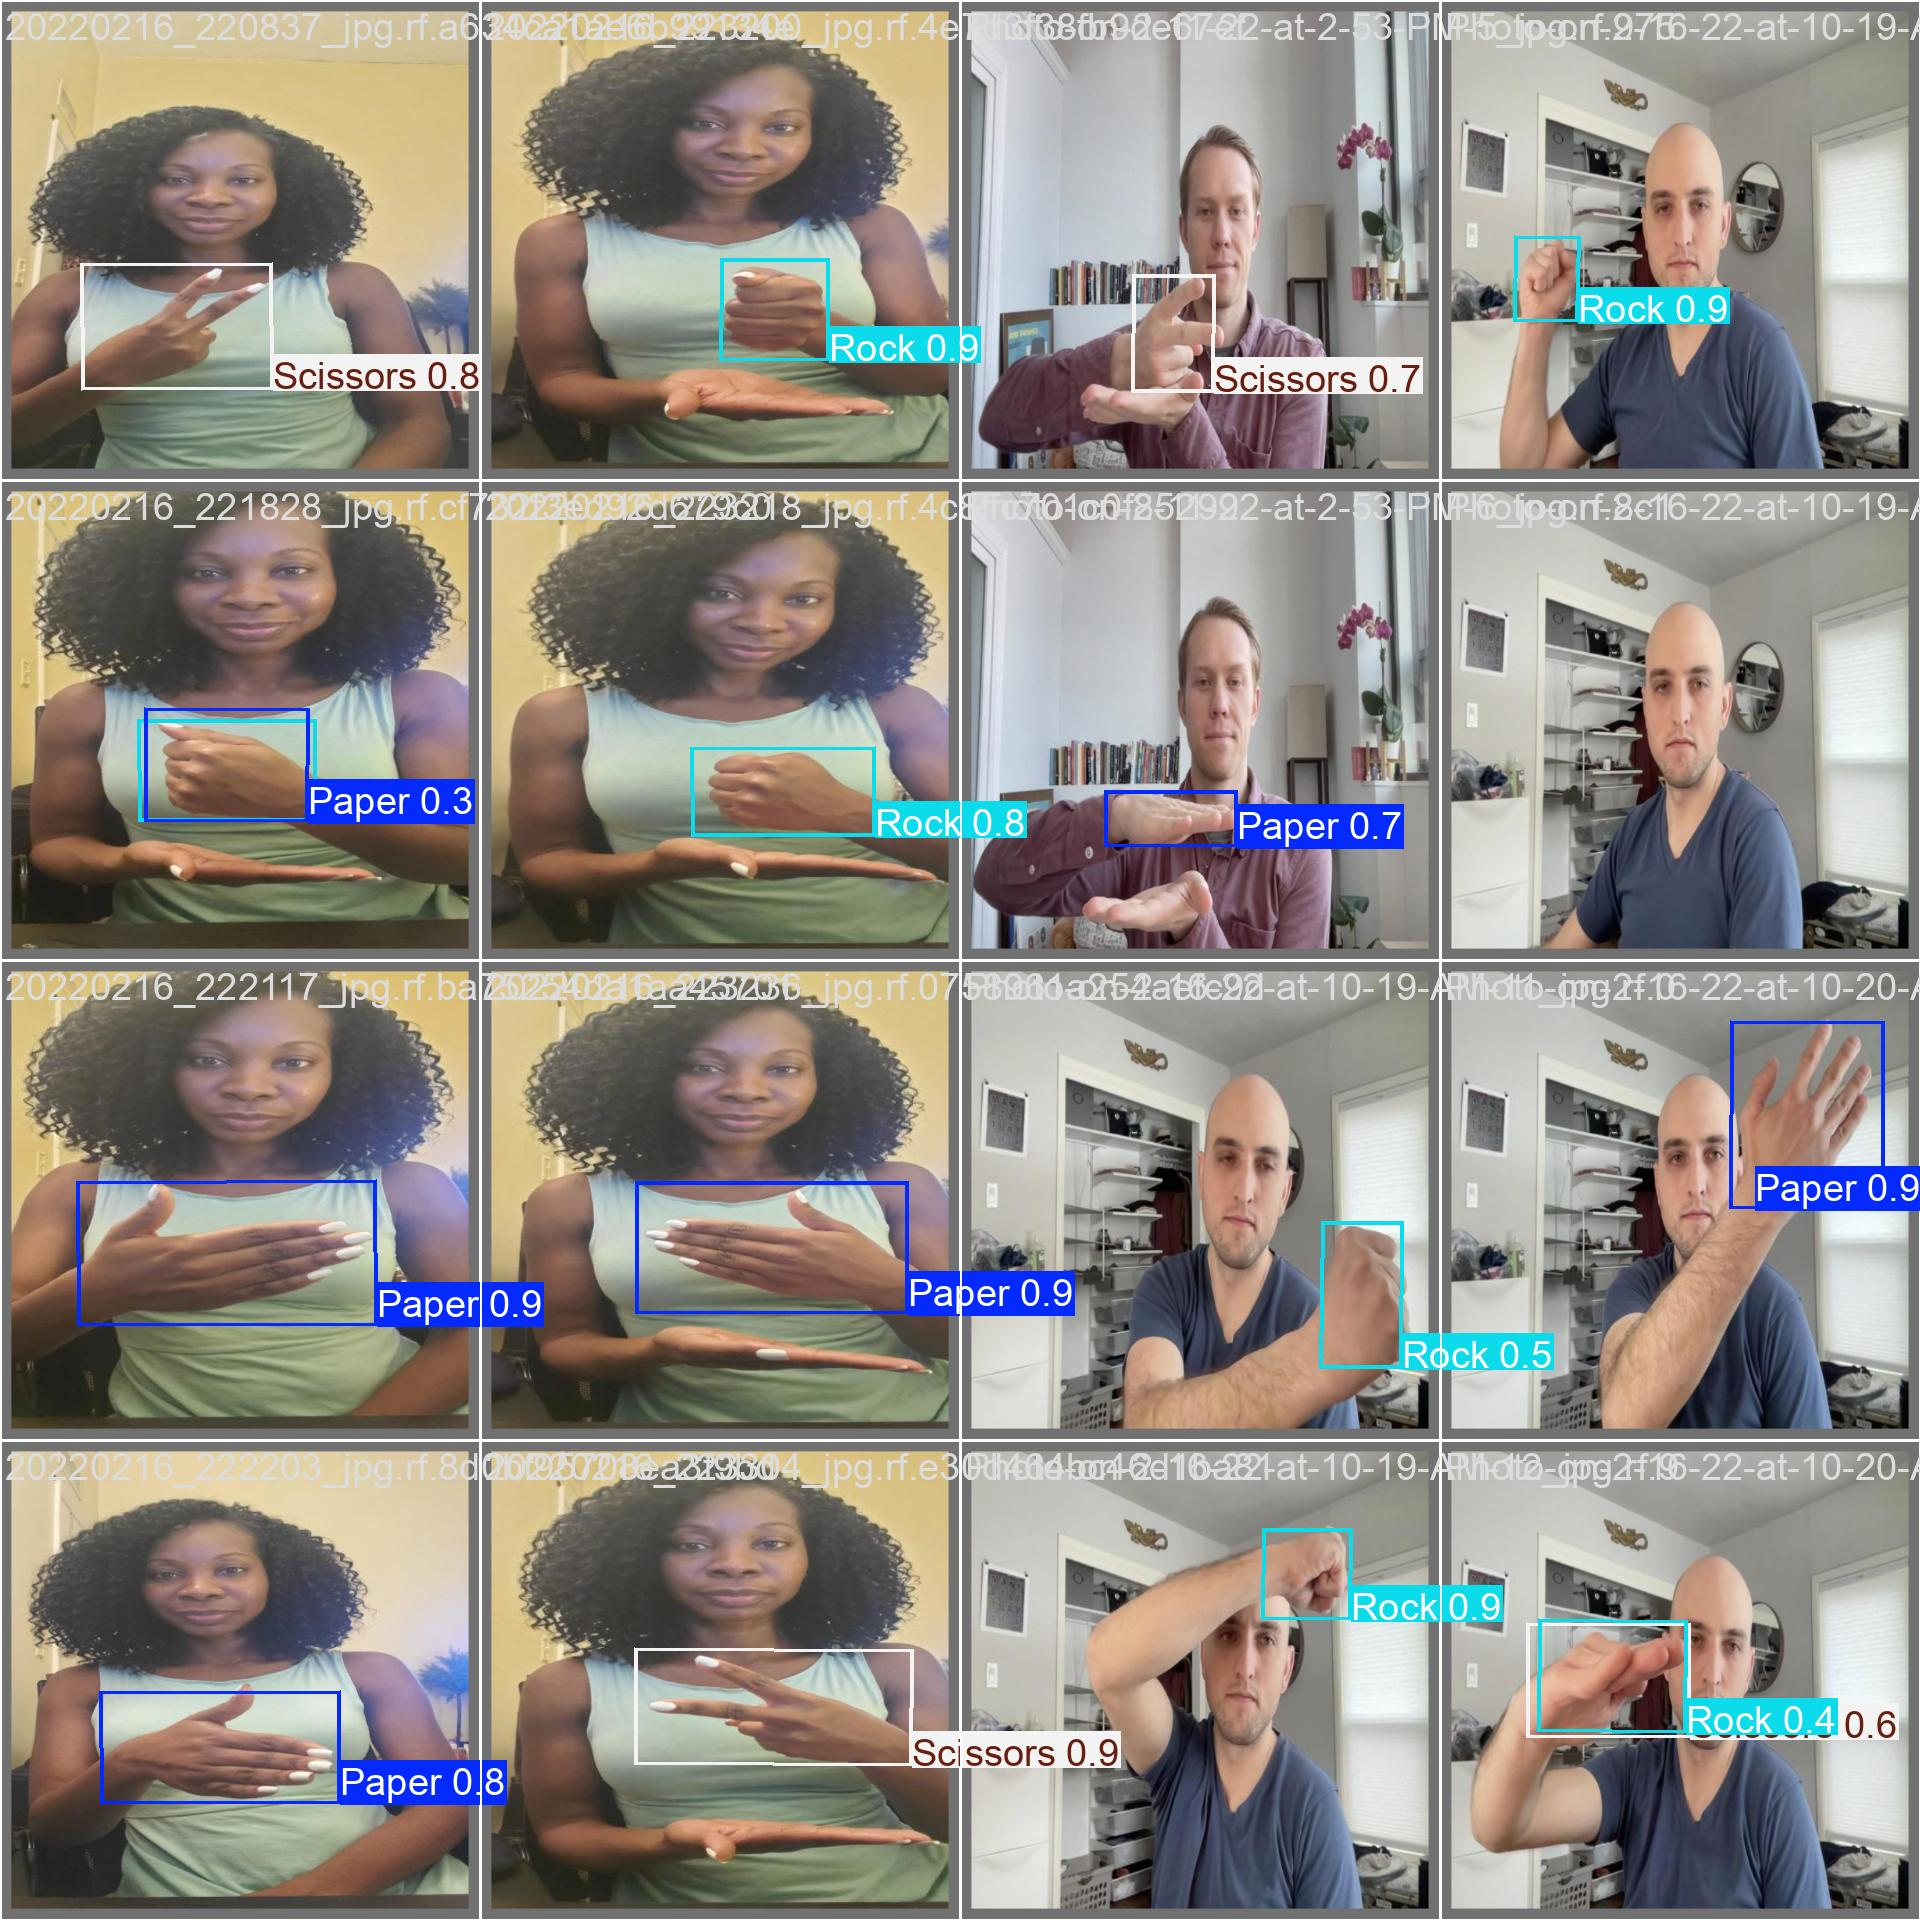

In [17]:
%cd {HOME}
from IPython.display import Image, display

# Pinalitan ang 'detect' -> 'obb' para mahanap ang tamang image
display(Image(filename=f'{HOME}/runs/obb/train/val_batch0_pred.jpg', width=800))

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.35s/it]
                   all         49       1174      0.928      0.741      0.825      0.547
                  ball         45         45      0.868      0.289      0.415      0.217
            goalkeeper         38         39      0.948      0.846      0.967      0.632
                player         49        973      0.977      0.962      0.988      0.749
               referee         49        117      0.919      0.867      0.931       0.59
Speed: 18.5ms preprocess, 26.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_3_6_png.rf.d031da4f257bbf91daf9845051fb9487.jpg: 800x800 1 ball, 19 players, 3 referees, 23.4ms
image 2/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_9_3_png.rf.509869506accd728341d8426de2f937a.jpg: 800x800 20 players, 1 referee, 22.9ms
image 3/25 /content/datasets/football-players-obj-detection-2/test/images/40cd38_7_6_png.rf.57bcce20df01cee3811f2b3576481f41.jpg: 800x800 1 goalkeeper, 20 players, 1 referee, 22.8ms
image 4/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_1_5_png.rf.ec272c23ac9c73ba68d85a630b6d2a22.jpg: 800x800 1 goalkeeper, 23 players, 2 referees, 22.8ms
image 5/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_5_5_png.rf.3fecd509745cf069d

**NOTE:** Let's take a look at few results.

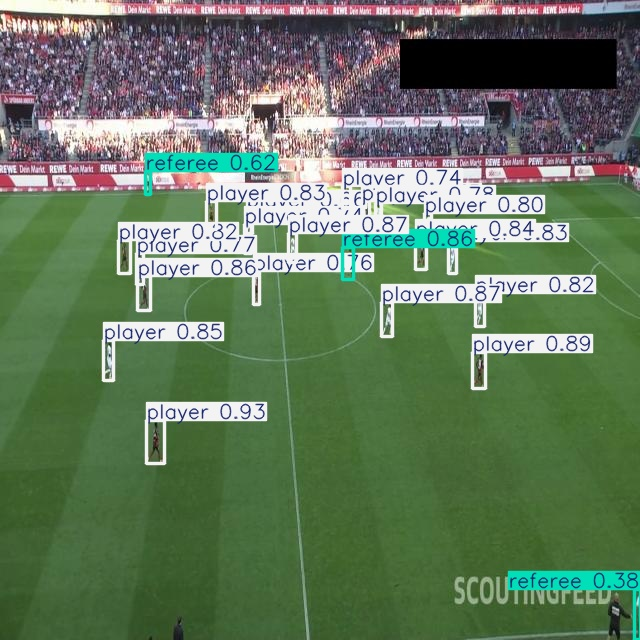

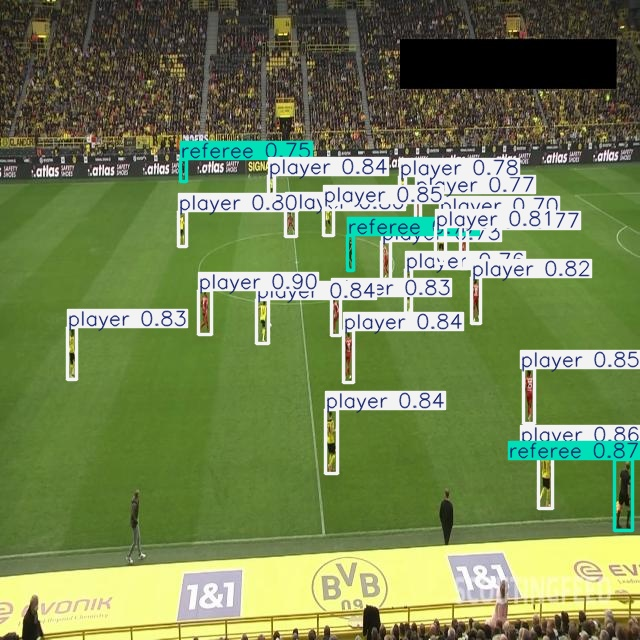

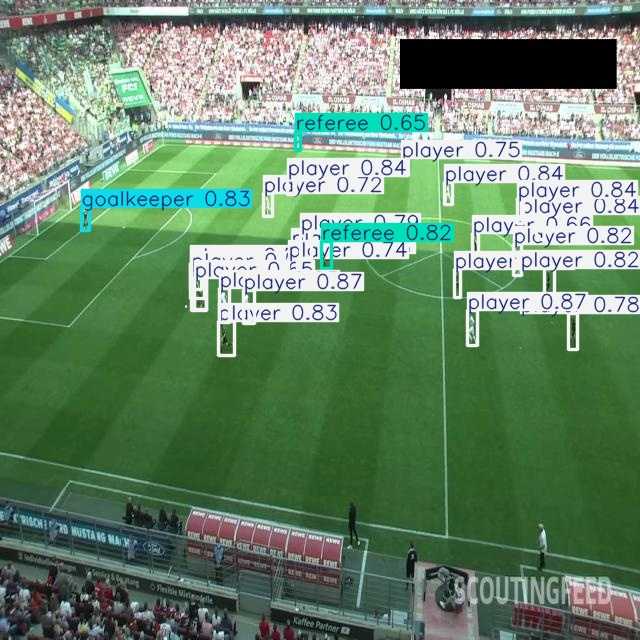

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/model-examples/football-players-obj-detection/2
Share your model with the world at: https://universe.roboflow.com/model-examples/football-players-obj-detection/model/2


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg


{'predictions': [{'x': 1227.0,
   'y': 527.5,
   'width': 50.0,
   'height': 77.0,
   'confidence': 0.9045102000236511,
   'class': 'player',
   'class_id': 2,
   'detection_id': '7bb0de78-c58d-454a-b693-c3f518f94f80',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 731.0,
   'y': 584.5,
   'width': 52.0,
   'height': 79.0,
   'confidence': 0.8924632668495178,
   'class': 'player',
   'class_id': 2,
   'detection_id': 'b3ea8a5a-5294-45c9-9221-ba8a6f0884b5',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 1397.5,
   'y': 344.5,
   'width': 31.0,
   'height': 55.0,
   'confidence': 0.8912790417671204,
   'class': 'player',
   'class_id': 2,
   'detection_id': '5ef87756-163e-442c-ad88-35f3572750d5',
   '

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.